# Principle Component Analysis (PCA) for Dimensionality Reduction 

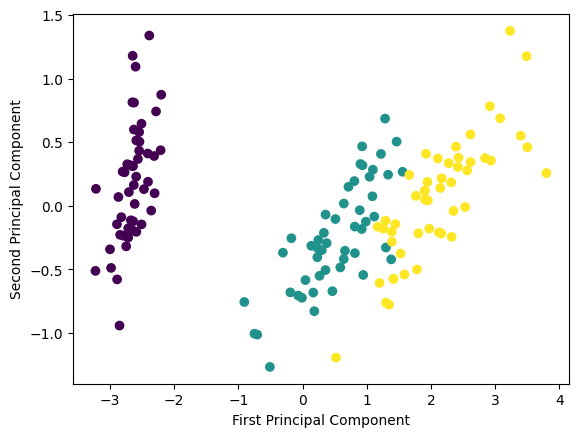

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()

pca = PCA(n_components=2)

# Fit_transform the model with the iris data
iris_pca = pca.fit_transform(iris.data)

#plot the 1st and 2nd principal components
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris.target)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

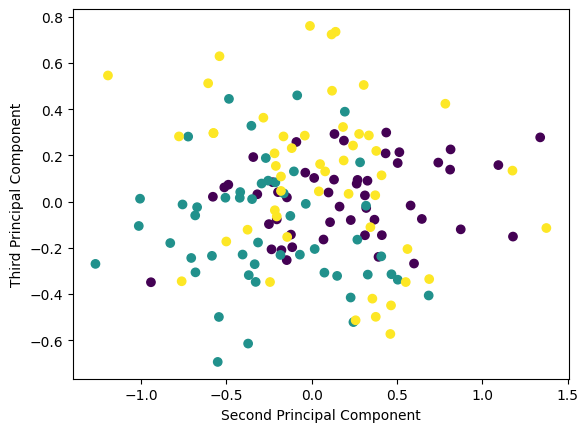

In [3]:
# plot 2nd and 3rd principal components
pca = PCA(n_components=3)
iris_pca = pca.fit_transform(iris.data)

#plot the 1st and 2nd principal components
plt.scatter(iris_pca[:, 1], iris_pca[:, 2], c=iris.target)
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')
plt.show()

We cannot differentiate on the basis of 2nd and 3rd component so thats why the most variation is in the first component. So we can reduce the dimensionality of the data by using PCA.

## PCA on Tips Dataset

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the tips dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
cat_col=['sex', 'smoker', 'day', 'time']

Le=LabelEncoder()

for col in cat_col:
    tips[col]=Le.fit_transform(tips[col])

# Standardize the data
scaler = StandardScaler()
tips_scaled = scaler.fit_transform(tips)

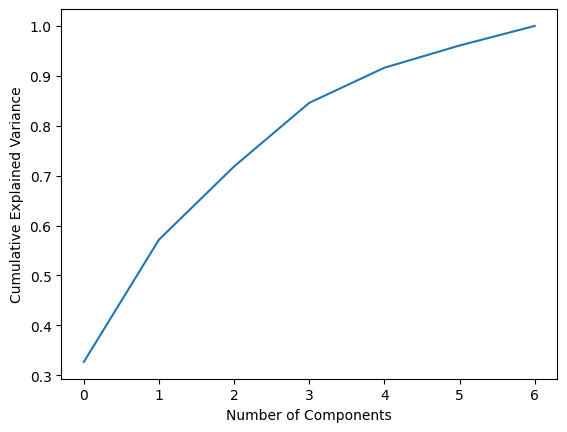

                 PC1       PC2       PC3       PC4       PC5       PC6  \
total_bill  0.577289  0.133642  0.164816  0.061756  0.058183 -0.378659   
tip         0.531650  0.178333  0.159316 -0.010375  0.637807  0.274214   
sex         0.189111 -0.152571 -0.588523  0.762364 -0.000506  0.115541   
smoker      0.036649 -0.335732  0.724260  0.501763 -0.212334 -0.111732   
day        -0.156579  0.660434 -0.047053  0.229846 -0.003218 -0.606759   
time       -0.281249  0.556479  0.266919  0.297170  0.004329  0.572115   
size        0.493317  0.261729 -0.055523 -0.148236 -0.738039  0.245190   

                 PC7  
total_bill -0.686390  
tip         0.421978  
sex        -0.007162  
smoker      0.228151  
day         0.340735  
time       -0.352618  
size        0.241370  


In [9]:
# apply PCA
pca = PCA()
pcar= pca.fit_transform(tips_scaled)
# plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Create a dataframe to show the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=tips.columns)
print(loadings)

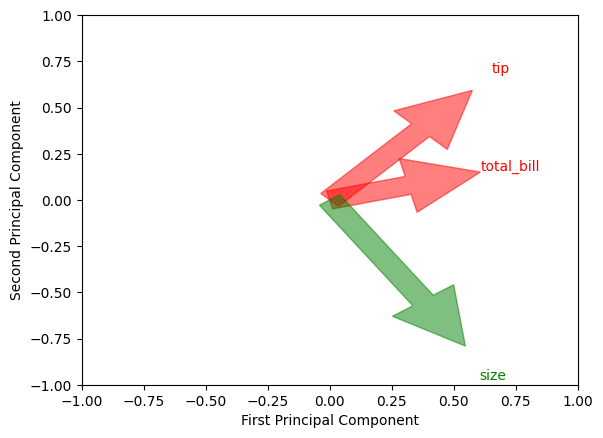

In [12]:
X = tips[['total_bill', 'tip', 'size']]
X = (X-X.mean())/X.std()

pca = PCA(n_components=2)
pca.fit(X)

# Add arrow indicating the direction of the loadings
features = pca.components_.T
for i, feature in enumerate(features):
    x, y = feature
    color = 'red' if x > 0 and y > 0 else 'blue' if x < 0 and y < 0 else 'green' if x > 0 and y < 0 else 'orange'
    plt.arrow(0, 0, x, y, color=color, alpha=0.5, width=0.1, head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(x*1.2, y*1.2, X.columns[i], color=color, ha='center', va='center', fontsize=10)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


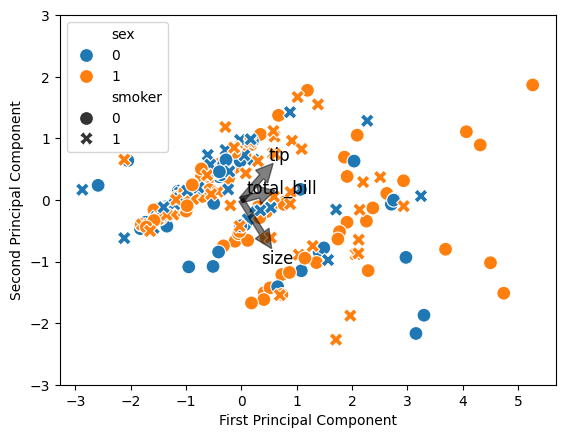

In [15]:
pca = PCA(n_components=2)
pcar = pca.fit_transform(X)
# Add the the principal components to dataset
tips['PC1'] = pcar[:, 0]
tips['PC2'] = pcar[:, 1]

# scatter plot of the first two principal components
sns.scatterplot(x='PC1', y='PC2', data=tips, hue='sex', style='smoker', s=100)

# Add arrow indicating the direction of the loadings
features = pca.components_.T
for i, feature in enumerate(features):
    plt.arrow(0, 0, feature[0], feature[1], color='black', alpha=0.5, width=0.1, head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(feature[0]*1.2, feature[1]*1.2, X.columns[i], color='black', ha='center', va='center', fontsize=12)

plt.ylim(-3, 3)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()